In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVC,SVR

from sklearn.model_selection import train_test_split
from numpy.polynomial.polynomial import polyfit

In [4]:
train          = pd.read_csv('output/train_cleaned.csv')
test           = pd.read_csv('output/test_cleaned.csv')
submit_example = pd.read_csv('input/sample_submission.csv')


In [5]:
train.head()

,carat,cut,color,clarity,depth,table,x,y,z,id,price
0,-0.632446,-0.981914,-1.525600,0.028001,0.383802,-1.097621,-0.558232,-0.581687,-0.534190,0,1845
1,1.555868,1.699679,1.412856,-0.581031,1.290434,1.130761,1.390745,1.377291,1.591276,1,10164
2,1.092956,0.805815,2.000547,1.246066,-0.034644,1.130761,1.079264,1.099914,1.102993,2,5513
3,0.840458,-0.981914,1.412856,0.637034,0.244320,-1.097621,0.972471,0.909217,0.988103,3,5174
4,1.955657,-0.088050,1.412856,0.637034,-0.383348,1.130761,1.720024,1.654668,1.648721,4,10957


# SVM

In [6]:
X_train = train.drop(columns = ['price','id'])
y_train = train.price
X_test = test.drop(columns = ['id'])


In [9]:
lr = GradientBoostingRegressor(min_samples_leaf=6, max_depth=40,max_leaf_nodes=500, min_samples_split=30)
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)

NameError: name 'GradientBoostingRegressor' is not defined

In [ ]:
print(f'RMSE = {mean_squared_error(y_pred_train, y_train)**0.5}')

# Predicting new data

RMSE = 2976.9803081118594


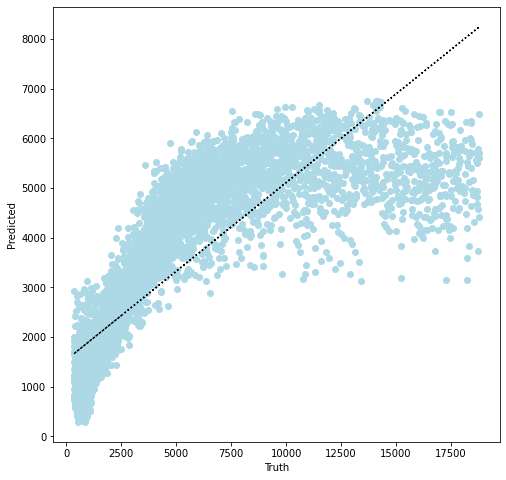

In [7]:
X = X_train
y = y_train
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)
p = SVR()
p.fit(X_tr, y_tr)
y_pred_te = p.predict(X_te)


n,m=polyfit(y_te,y_pred_te,1)
plt.figure(figsize=(8,8))
plt.scatter(x = y_te, y = y_pred_te, c="lightblue")
plt.plot(y_te,  m*(y_te) + n   ,':', c="black")

plt.xlabel("Truth")
plt.ylabel("Predicted")
print(f'RMSE = {mean_squared_error(y_pred_te, y_te)**0.5}')

# Submit


In [9]:
y_pred_test = lr.predict(X_test)
test['price'] = y_pred_test

In [10]:
submit = test[['id', 'price']]

In [11]:
submit.to_csv('output/GradientBoostingRegressor.csv', index=False)

In [12]:
submit

,id,price
0,0,1002.437946
1,1,6737.958655
2,2,762.808740
3,3,1840.325491
4,4,1011.312805
...,...,...
13480,13480,476.520729
13481,13481,4463.530575
13482,13482,1012.547074
13483,13483,734.111338
